# Consultas SQL
---------------------
Abordemos las consultas SQL con un caso práctico.
Consideremos la tienda de venta de productos para mascotas **Love4Pets**, la cual ha creado una base de datos SQL con el fin de llevar un control de sus empleados, ventas y suministro de productos.

In [3]:
%%capture

#librerias.
#para no mostrar la salida.
!pip install sqlalchemy==1.3.9
!pip install ibm_db_sa
!pip install ipython-sql


In [4]:
%load_ext sql
%sql sqlite:///love4pets.db

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


La base de datos **love4pets.db** contiene diferentes tablas, cada una almacena información relativa a un aspecto de la empresa, agrupando esta información en forma de campos.

Por ejemplo **love4pets.db** tiene una tabla **departamento** que está formada por el código del departamento y el nombre que este departamento posee en la empresa. Podemos ver estos campos a continuación:

In [5]:
%sql select * from departamento;

 * sqlite:///love4pets.db
Done.


departamento_id,nombre
1,finanzas
2,ventas
3,recursos humanos
4,marketing
5,veterinario
6,informatica
7,investigacion


Otras tablas existentes en **love4pets.db** son:  
* Empleado
* Cliente
* Mascota
* Producto
* Orden o Factura
* Detalle_orden
* Proveedor
* Suministro

Consultas básicas de selección
--------
La sintaxis básica de una consulta de selección es la siguiente:

```sql
select Campo FROM Tabla;
```
Pero para hacer esa consulta debemos conocer el nombre del campo que queremos consultar. Podemos mostrar el "schema" o diseño de la tabla con la instrucción **PRAGMA table_info(Tabla);** 

In [6]:
%sql PRAGMA table_info(empleado);

 * sqlite:///love4pets.db
Done.


cid,name,type,notnull,dflt_value,pk
0,empleado_id,INTEGER,1,None,1
1,nombre,TEXT,1,None,0
2,email,TEXT,0,None,0
3,telefono,TEXT,0,None,0
4,salario,INTEGER,1,None,0
5,fecha_ingreso,DATETIME,1,CURRENT_DATE,0
6,departamento_id,INTEGER,0,None,0


Podemos observar que la Tabla **empleado** contiene los campos:
* empleado_id
* nombre
* email
* telefono
* salario
* fecha_ingreso
* departamento_id

Veamos ahora un ejemplo de selección a alguno de estos campos:

In [7]:
%sql select nombre FROM empleado;

 * sqlite:///love4pets.db
Done.


nombre
Andres Riera Herrera
Lucas Serrano Caballero
Pablo Pons Sanz
Saul Moreno Santos
Nil Soler Diez
Sergio Reyes Gallardo
Isaac Jimenez Ortiz
Guillermo Vidal Gomez
Daniel Quintero Quintero
Juan Manuel Olivares


Podemos agregar mas campos a mostrar en una misma consulta al separar los campos por comas(,) por ejemplo:

In [8]:
%sql select nombre, telefono FROM empleado;

 * sqlite:///love4pets.db
Done.


nombre,telefono
Andres Riera Herrera,200-88-76
Lucas Serrano Caballero,115-24-36
Pablo Pons Sanz,748-72-75
Saul Moreno Santos,346-87-27
Nil Soler Diez,576-84-28
Sergio Reyes Gallardo,598-95-67
Isaac Jimenez Ortiz,370-19-65
Guillermo Vidal Gomez,099-05-68
Daniel Quintero Quintero,261-97-06
Juan Manuel Olivares,269-37-06


Tambien es posible solicitar todos los campos de una tabla con el signo asterisco(*):

In [9]:
%sql select * FROM empleado;

 * sqlite:///love4pets.db
Done.


empleado_id,nombre,email,telefono,salario,fecha_ingreso,departamento_id
1,Andres Riera Herrera,andresr@gmail.com,200-88-76,1500,2017-05-17 00:00:000,6
2,Lucas Serrano Caballero,lucas99@gmail.com,115-24-36,1200,2018-05-17 00:00:000,2
3,Pablo Pons Sanz,ppsanz@gmail.com,748-72-75,1350,2016-07-01 00:00:000,1
4,Saul Moreno Santos,saul.morenosantos@gmail.com,346-87-27,1600,2016-07-01 00:00:000,1
5,Nil Soler Diez,nilsoler@gmail.com,576-84-28,1100,2016-04-03 00:00:000,5
6,Sergio Reyes Gallardo,zerg@gmail.com,598-95-67,1000,2016-04-03 00:00:000,5
7,Isaac Jimenez Ortiz,isaacortiz@gmail.com,370-19-65,1600,2016-07-08 00:00:000,3
8,Guillermo Vidal Gomez,guillevidal@gmail.com,099-05-68,1400,2016-01-03 00:00:000,3
9,Daniel Quintero Quintero,danielquinterox2@gmail.com,261-97-06,1500,2017-03-05 00:00:000,6
10,Juan Manuel Olivares,juanma@gmail.com,269-37-06,1500,2017-03-05 00:00:000,None


<div style="background-color: #81F781">
 <h1> Ejercicio 1. </h1><br>
    Complete el siguiente código para obtener un listado de los nombres, email, telefonos y ciudad de todos los clientes.
 <br><br>
</div>

In [21]:
%sql

 * sqlite:///love4pets.db
(sqlite3.OperationalError) no such column: ciudad
[SQL: select nombre,email,telefono,ciudad FROM empleado;]
(Background on this error at: https://sqlalche.me/e/20/e3q8)


### Ordenar los registros, ORDER BY
--------
Es posible especificar el orden en que queremos que se muestre resultado de una consulta, esto se consigue con la clausula **ORDER BY** 
```sql
select campo1,campo2,...,campoN FROM Tabla ORDER BY campoX;
```
Veamos un ejemplo sobre la tabla empleado:

**Liste los empleados de Love4Pets ordenados por su salario**

In [22]:
%sql select nombre, salario FROM empleado ORDER BY salario;

 * sqlite:///love4pets.db
Done.


nombre,salario
Sergio Reyes Gallardo,1000
Nil Soler Diez,1100
Lucas Serrano Caballero,1200
Pablo Pons Sanz,1350
Guillermo Vidal Gomez,1400
Andres Riera Herrera,1500
Daniel Quintero Quintero,1500
Juan Manuel Olivares,1500
Saul Moreno Santos,1600
Isaac Jimenez Ortiz,1600


Se puede ordenar el resultado por mas de un campo, por ejemplo podemos ordenar los empleados segun su sueldo usando el campo **salario** y además en orden alfabetico por el campo **nombre**

In [23]:
%sql select nombre, salario FROM empleado ORDER BY salario, nombre;

 * sqlite:///love4pets.db
Done.


nombre,salario
Sergio Reyes Gallardo,1000
Nil Soler Diez,1100
Lucas Serrano Caballero,1200
Pablo Pons Sanz,1350
Guillermo Vidal Gomez,1400
Andres Riera Herrera,1500
Daniel Quintero Quintero,1500
Juan Manuel Olivares,1500
Isaac Jimenez Ortiz,1600
Saul Moreno Santos,1600


Además puede usarse el ordenar por campos de forma independiente, de forma ASCENDENTE mediante la clausula **ASC** y DESCENDENTE mediante la clausula **DESC**

In [24]:
%sql select nombre, salario FROM empleado ORDER BY salario DESC, nombre ASC;

 * sqlite:///love4pets.db
Done.


nombre,salario
Miguel Soto,1900
Alejandro Fernandez,1850
Isaac Jimenez Ortiz,1600
Saul Moreno Santos,1600
Andres Riera Herrera,1500
Daniel Quintero Quintero,1500
Juan Manuel Olivares,1500
Guillermo Vidal Gomez,1400
Pablo Pons Sanz,1350
Lucas Serrano Caballero,1200


La instrucción  **Limit** reduce la cantidad de filas de salida en el resultado al número indicado.
Cuando usamos la instrucción LIMIT junto con el ORDER BY estamos tomando alguno de los extremos de la consulta, por ejemplo los 3 sueldos mas altos, o los 5 sueldos mas bajos.

Veamos un par de ejemplos de esto:

In [25]:
%sql select nombre,salario FROM empleado ORDER BY salario DESC LIMIT 3;

 * sqlite:///love4pets.db
Done.


nombre,salario
Miguel Soto,1900
Alejandro Fernandez,1850
Saul Moreno Santos,1600


In [26]:
%sql select nombre,salario FROM empleado ORDER BY salario ASC LIMIT 5;

 * sqlite:///love4pets.db
Done.


nombre,salario
Sergio Reyes Gallardo,1000
Nil Soler Diez,1100
Lucas Serrano Caballero,1200
Pablo Pons Sanz,1350
Guillermo Vidal Gomez,1400


### Filtro sobre operación de selección, DISTINCT
------
La Instrucción DISTINCT omite en el resultado los campos que son iguales.

Veamos un ejemplos:

In [27]:
%sql select DISTINCT salario FROM empleado ORDER BY salario DESC;

 * sqlite:///love4pets.db
Done.


salario
1900
1850
1600
1500
1400
1350
1200
1100
1000


En el ejemplo anterior se muestran solamente los diferentes salarios, aún cuando 2 empleados tienen un sueldo de 1600 y otros 2 de 1500

### La Clausula **WHERE**:
Se usa para indicar que se limita la selección a los campos que cumplan una determinada condición.

```sql
select campo1,campo2,...,campoN FROM Tabla WHERE condición;
```

#### Operadores usados en la clausula WHERE
| Operador |  Descripción |
|----------|--------------|
| = |  igualdad |
| <> |  Distinto uno de otro |
| > |  Mayor que |
| < |  Menor que |
| =< |  Mayor o igual que |
| <= |  Menor o igual que |
| Between |  Entre un cierto rango |
| LIKE |  Cumple una estructura dada |
| IN |  Permite comparar con multiples valores |

Veamos algunos ejemplos de la clausula WHERE:

In [28]:
%sql select nombre, salario FROM empleado WHERE salario > 1500;

 * sqlite:///love4pets.db
Done.


nombre,salario
Saul Moreno Santos,1600
Isaac Jimenez Ortiz,1600
Miguel Soto,1900
Alejandro Fernandez,1850


In [29]:
%sql select nombre, salario FROM empleado WHERE salario = 1350;

 * sqlite:///love4pets.db
Done.


nombre,salario
Pablo Pons Sanz,1350


In [30]:
%sql select nombre, salario FROM empleado WHERE ( salario >= 1400 AND salario <= 1600 );

 * sqlite:///love4pets.db
Done.


nombre,salario
Andres Riera Herrera,1500
Saul Moreno Santos,1600
Isaac Jimenez Ortiz,1600
Guillermo Vidal Gomez,1400
Daniel Quintero Quintero,1500
Juan Manuel Olivares,1500


<div style="background-color: #81F781">
 <h1> Ejercicio 2. </h1><br>
    Con el propósito actualizar la información de los clientes se quiere contactar a aquellos clientes que no tienen asociada una persona de contacto, para esto se pide que muestre de la tabla "cliente" los campos "nombre" y "telefono" de los clientes que no tienen un "telefono_contacto" registrado.
 <br><br>
</div>

In [31]:
%sql

 * sqlite:///love4pets.db
Done.


nombre,telefono
Arnau Medina Garcia,094-10-88
Jan Vargas Santana,780-65-24
Pol Moya Pena,780-25-24


### EL operador BETWEEN
Esta última instrucción puede escribirse de otra forma usando el operador **BETWEEN**, este operador es usado cuando queremos indicar que deseamos recuperar los registros según un intervalo de valores dado sobre un campo.

In [20]:
%sql select nombre, salario FROM empleado WHERE salario Between 1400 AND 1600

 * sqlite:///love4pets.db
Done.


nombre,salario
Andres Riera Herrera,1500
Saul Moreno Santos,1600
Isaac Jimenez Ortiz,1600
Guillermo Vidal Gomez,1400
Daniel Quintero Quintero,1500
Juan Manuel Olivares,1500


### EL operador Like
Este operador es usado cuando se filtra la consulta con algún modelo o patrón sobre una columna.
Este operador se combina con simbolos "%" y "_":
* % Representa cero o mas caracteres a ser reemplazados en el patron por otros.
* _ Representa un único caracter.

Veamos algúnos ejemplos:

In [ ]:
%sql select * FROM cliente WHERE nombre LIKE "%Medina%";

La instrucción anterior busca todos los clientes cuyo nombre contiene la secuencia de caracteres "Medina" en alguna posición.

In [ ]:
%sql select * FROM cliente WHERE email LIKE "%@gmail.com";

EL comando anterior busca los clientes que tienen un correo que termine en "@gmail.com".

**Veamos a consultar todos los clientes cuyo número telefónico comience por "780"**

In [ ]:
%sql select * FROM cliente WHERE telefono LIKE "780-%";

<div style="background-color: #81F781">
 <h1> Ejercicio 3. </h1><br>
   Un empleado de la empresa Love4Pets se dió cuenta que un cliente dejó por accidente su celular, el empleado recuerda que alguno de sus apellidos era "Martin".
   
   Se quiere que determinar a quien pertenece el celular extraviado, y en caso de ser posible avisar a su persona de contacto que el celular está a salvo y pueden pasar buscandolo en cualquier momento.
   
   Se sabe que la tabla **"cliente"** tiene un campo **"nombre"** el cual contiene nombres y apellidos, el campo **"contacto"** que tiene el nombre de la persona de contacto y el campo **"telefono_contacto"** que tiene el telefono de la persona de contacto.
   
   <br><br>
 
</div>

In [33]:
%sql

 * sqlite:///love4pets.db
Done.


telefono_contacto,contacto
564-52-13,Jorge Vila Gallardo


### Operadores AND, OR, NOT
Estos operadores son usados para filtrar resultados según mas de una condición. 

**Operador AND:** Se muestran los resultados que cumplen las condiciones separadas por el operador AND, es decir el resultado de la operación AND tiene valor TRUE

Sintaxis del Operador AND
```sql
select campo FROM Tabla WHERE condicion1 AND condicion2;
```

**Operador OR:** Se muestran los resultados que cumplen alguna de las condiciones separadas por el operador OR, es decir el resultado de la operación OR tiene valor TRUE

Sintaxis del Operador OR
```sql
select campo FROM Tabla WHERE condicion1 OR condicion2;
```

**Operador NOT:** Se muestran los resultados que NO cumplen con la condicion indicada.

Sintaxis del Operador NOT
```sql
select campo FROM Tabla WHERE NOT condicion1;
```


In [34]:
%sql select * FROM empleado WHERE ( salario >= 1500 AND departamento_id = 6 )

 * sqlite:///love4pets.db
Done.


empleado_id,nombre,email,telefono,salario,fecha_ingreso,departamento_id
1,Andres Riera Herrera,andresr@gmail.com,200-88-76,1500,2017-05-17 00:00:000,6
9,Daniel Quintero Quintero,danielquinterox2@gmail.com,261-97-06,1500,2017-03-05 00:00:000,6
11,Miguel Soto,misoto@gmail.com,269-92-06,1900,2017-03-05 00:00:000,6
12,Alejandro Fernandez,alefer@gmail.com,119-91-16,1850,2017-03-05 00:00:000,6


En el ejemplo anterior la consulta muestra los empleados que tienen un salario mayor o igual a 1500 y que trabajan en el departamento de informática el cual tiene código 6.

Veamos como podemos usar **consultas anidadas** para buscar la misma consulta colocando el nombre del departamento en lugar del código.

In [35]:
%%sql 
select * FROM empleado
WHERE 
( salario >= 1500 AND departamento_id = (select departamento_id FROM departamento WHERE nombre="informatica" ) )  

 * sqlite:///love4pets.db
Done.


empleado_id,nombre,email,telefono,salario,fecha_ingreso,departamento_id
1,Andres Riera Herrera,andresr@gmail.com,200-88-76,1500,2017-05-17 00:00:000,6
9,Daniel Quintero Quintero,danielquinterox2@gmail.com,261-97-06,1500,2017-03-05 00:00:000,6
11,Miguel Soto,misoto@gmail.com,269-92-06,1900,2017-03-05 00:00:000,6
12,Alejandro Fernandez,alefer@gmail.com,119-91-16,1850,2017-03-05 00:00:000,6


Veamos un ejemplo donde consultamos las mascotas asociadas a una persona con nombre "Arnau Medina Garcia"

In [36]:
%%sql 
select * FROM mascota WHERE  cliente_id=( select cliente_id FROM cliente WHERE nombre="Arnau Medina Garcia" )

 * sqlite:///love4pets.db
Done.


mascota_id,nombre,cliente_id,especie,raza,fecha_nacimiento
1,Luna,2,gato,mestizo,2009-01-01 00:00:000


Ejemplo con Operador **OR**

In [37]:
%%sql 
select nombre, departamento_id from empleado where (empleado.departamento_id = 1) OR (empleado.departamento_id = 3)

 * sqlite:///love4pets.db
Done.


nombre,departamento_id
Pablo Pons Sanz,1
Saul Moreno Santos,1
Isaac Jimenez Ortiz,3
Guillermo Vidal Gomez,3


En la consulta anterior se muestran los empleados que trabajan en el departamento de Finanzas o en el departamento de Recursos Humanos

Ejemplo con el operador **NOT**

Veamos el complemento de la consulta anterior.

In [38]:
%%sql 
select nombre, departamento_id from empleado
where
NOT ( (empleado.departamento_id = 1) OR (empleado.departamento_id = 3) )

 * sqlite:///love4pets.db
Done.


nombre,departamento_id
Andres Riera Herrera,6
Lucas Serrano Caballero,2
Nil Soler Diez,5
Sergio Reyes Gallardo,5
Daniel Quintero Quintero,6
Miguel Soto,6
Alejandro Fernandez,6


<div style="background-color: #81F781">
 <h1> Ejercicio 4. </h1><br>
      La empresa Love4Pets considera hacer un descuento sobre los productos que cuestan entre 10 y 20 euros (ambos incluidos), y complementos vitamínicos. 
      
   Se requiere que liste las columnas "nombre", "descripcion", "precio" de productos a los que debe ser aplicado el descuento. ( asuma que los productos se encuentran en la tabla "producto" )
   
   Asuma que el producto vitaminico no lleva acentos, generalmente estos productos tienen la palabra vitamina en la **"descripcion"** pero podria ser alguna variante como vitaminico o comenzar por mayusculas, el departamento de informática recomendó usar la función Like para esta busqueda.
   
   <br><br>
 
</div>

In [46]:
%sql

 * sqlite:///love4pets.db
Done.


producto_id,nombre,descripcion,precio
2,Vitaminas,Complemento vitaminico,5
4,Perrarina,Huesos,12
5,Gatarina,Catspettito,13
8,Consulta,Consulta veterinaria,15
9,Juguete,Jugueta para gatos,20


### Funciones Max() y Min()
Con frecuencia tenemos una lista de valores y queremos obtener el mayor o el menor, esto es lo que hacen las funciones Max y Min.

Sintaxis de la función MIN
```sql
SELECT MIN(column_name)
FROM table_name
WHERE condition; 
```

Sintaxis de la función MAX
```sql
SELECT MAX(column_name)
FROM table_name
WHERE condition; 
```
Veamos un ejemplo:

In [ ]:
%sql select MIN(precio) from producto;

In [ ]:
%sql select MAX(precio) from producto;

<div style="background-color: #81F781">
 <h1> Ejercicio 5. </h1><br>
    La empresa Love4Pets esta considerando realizar un aumento.
    
   Se requiere que indique cual es el mayor sueldo que está pagando la empresa.
 <br><br>
</div>

In [48]:
%sql

 * sqlite:///love4pets.db
Done.


max(salario)
1900


### Funciones COUNT(), AVG(), SUM()
Nos permite contar la cantidad de resultados que arroja una consulta, obtener un valor promedio, o sumar los valores de una consulta.

**Función count** Retorna la cantidad de filas que arroja una consulta.

Sintaxis de la función COUNT
```sql
SELECT COUNT(column_name)
FROM table_name
WHERE condition; 
```

**Función AVG** Retorna la el promedio de los valores de las filas que arroja una consulta.

Sintaxis de la función COUNT
```sql
SELECT AVG(column_name)
FROM table_name
WHERE condition; 
```

**Función SUM** Retorna la el promedio de los valores de las filas que arroja una consulta.

Sintaxis de la función COUNT
```sql
SELECT SUM(column_name)
FROM table_name
WHERE condition; 
```

In [22]:
%sql select COUNT(salario) from empleado;

 * sqlite:///love4pets.db
Done.


COUNT(salario)
12


In [49]:
%sql select AVG(salario) from empleado;

 * sqlite:///love4pets.db
Done.


AVG(salario)
1458.3333333333333


In [50]:
%sql select SUM(salario) from empleado;

 * sqlite:///love4pets.db
Done.


SUM(salario)
17500


<div style="background-color: #81F781">
 <h1> Ejercicio 6. </h1><br>
    La empresa Love4Pets continúa estudiando un ajuste de coste, por lo que se quiere conocer el precio medio de los productos que hay disponibles. 
 <br><br>

In [51]:
%sql

 * sqlite:///love4pets.db
Done.


avg(precio)
9.0


### El Operador IN
Permite especificar multiples valores a la clausula WHERE

Sintaxis del operador IN
```sql
SELECT column_name(s)
FROM table_name
WHERE column_name IN (value1, value2, ...); 
```
Veamos un ejemplo

In [52]:
%sql select nombre from cliente where ciudad IN ("Madrid","Toledo");

 * sqlite:///love4pets.db
Done.


nombre
Mario Flores Gallardo
Arnau Medina Garcia
Ivan Medina Rubio
Jan Vargas Santana
Carlos Costa Guerrero
Roberto Martin Ortega
Gabriel Gonzalez Ortega
Rayan Leon Ferrer
Aitor Ruiz Sanchez
Eric Rubio Carrasco


Hasta ahora hemos realizado consultas muy sencillas casi todas sobre una sola tabla, sin aprovechar las relaciones que existen entre las tablas.

Algunas de las tablas en Love4Pets están relacionadas  por medio de claves foraneas, por ejemplo la tabla empleado tiene un campo departamento_id que almacena el código del departamento donde trabaja un empleado, por medio de está relación podemos consultar también el nombre del departamento, esta consulta puede hacerse haciendo consultas anidadas, pero también usando la clausula **JOIN**

### Clausula JOIN
La clausula JOIN es usada para combinar columnas de una o mas tablas por medio de campos que relacionan estas tablas.

Existen diferentes tipos de JOIN.  
#### **Inner JOIN**:
Retorna los valores cumplen la relación entre ambas tablas, es decir las filas de una tabla que estan relacionadas con filas de otra tabla por medio de claves foraneas. El INNER JOIN también es llamado simplemente JOIN.
![Texto alternativo](https://raw.githubusercontent.com/dasesu/practicasql/master/imagenes/inner%20join.png)

Sintaxis del Inner Join

```sql
select campo1, campo2, campoN FROM tabla1 INNER JOIN tabla2 ON tabla1.campo = tabla2.campo;
```

Veamos un ejemplo:  
Primero veamos la siguiente consulta


In [53]:
%%sql
select empleado.nombre, departamento.nombre from empleado, departamento
WHERE
empleado.departamento_id = departamento.departamento_id;

 * sqlite:///love4pets.db
Done.


nombre,nombre_1
Andres Riera Herrera,informatica
Lucas Serrano Caballero,ventas
Pablo Pons Sanz,finanzas
Saul Moreno Santos,finanzas
Nil Soler Diez,veterinario
Sergio Reyes Gallardo,veterinario
Isaac Jimenez Ortiz,recursos humanos
Guillermo Vidal Gomez,recursos humanos
Daniel Quintero Quintero,informatica
Miguel Soto,informatica


Se muestran todos los empleados que trabajan en algun departamento, en esta consulta se excluyen empleados que no trabajan en ningun departamento y departamentos que no tienen ningun empleado.

Veamos ahora la siguiente consulta

In [54]:
%%sql
select empleado.nombre, departamento.nombre from empleado
INNER JOIN
departamento ON empleado.departamento_id = departamento.departamento_id;

 * sqlite:///love4pets.db
Done.


nombre,nombre_1
Andres Riera Herrera,informatica
Lucas Serrano Caballero,ventas
Pablo Pons Sanz,finanzas
Saul Moreno Santos,finanzas
Nil Soler Diez,veterinario
Sergio Reyes Gallardo,veterinario
Isaac Jimenez Ortiz,recursos humanos
Guillermo Vidal Gomez,recursos humanos
Daniel Quintero Quintero,informatica
Miguel Soto,informatica


Esta instrucción realiza la misma consulta que el comando anterior, es decir muestra los empleados que trabajan en algun departamento

#### **Left JOIN**:
Retorna los registros de la tabla "izquierda" o la primera tabla, y los registros que coinciden con la segunda tabla, excluyendo los registros que se encuentren en la segunda tabla pero que no hagan match con la primera.
![Texto alternativo](https://raw.githubusercontent.com/dasesu/practicasql/master/imagenes/left%20join.png)

Sintaxis del LEFT JOIN
```sql
select campo1, campo2, campoN FROM tabla1 LEFT JOIN tabla2 ON tabla1.campo = tabla2.campo;
```

Veamos un ejemplo:  

In [55]:
%%sql
select empleado.nombre, departamento.nombre from empleado
LEFT JOIN
departamento ON empleado.departamento_id = departamento.departamento_id;

 * sqlite:///love4pets.db
Done.


nombre,nombre_1
Andres Riera Herrera,informatica
Lucas Serrano Caballero,ventas
Pablo Pons Sanz,finanzas
Saul Moreno Santos,finanzas
Nil Soler Diez,veterinario
Sergio Reyes Gallardo,veterinario
Isaac Jimenez Ortiz,recursos humanos
Guillermo Vidal Gomez,recursos humanos
Daniel Quintero Quintero,informatica
Juan Manuel Olivares,None


En el resultado anterior observe que el empleado "Juan Manuel Olivares" no está asociado a ningun departamento, sin embargo este es mostrado porque forma parte de la tabla1, pero no en la tabla2


#### **Right JOIN**:
Retorna los registros de la tabla "derecha" o la segunda tabla, y los registros que coinciden con la primera tabla, excluyendo los registros que se encuentren en la primera tabla pero que no hagan match con la segunda.

![Texto alternativo](https://raw.githubusercontent.com/dasesu/practicasql/master/imagenes/right%20join.png)

Sintaxis del RIGHT JOIN
```sql
select campo1, campo2, campoN FROM tabla1 RIGHT JOIN tabla2 ON tabla1.campo = tabla2.campo;
```

**Esta instrucción no es reconocida por Sqlite3, por lo que al tratar de ejecutar esta sentencia se obtendrá un error.**

Sin embargo esta instrucción puede construirse usando un LEFT JOIN invirtiendo el orden de las tablas.

Veamos un ejemplo. ( El siguiente es un error provocado de forma intencional )

In [ ]:
%%sql
select empleado.nombre, departamento.nombre from empleado
RIGHT JOIN
departamento ON empleado.departamento_id = departamento.departamento_id;

El siguiente código arroja el mismo resultado que debería arrojar el RIGHT JOIN, haciendo uso del LEFT JOIN, invirtiendo las la posición de las tablas

In [ ]:
%%sql
select departamento.nombre, empleado.nombre from departamento
LEFT JOIN
empleado ON empleado.departamento_id = departamento.departamento_id;

<div style="background-color: #81F781">
 <h1> Ejercicio 7. </h1><br>
   Considerando la tabla "cliente" y la tabla "mascota" las cuales tienen una relación uno a muchos, como se muestra a continuación.
   
   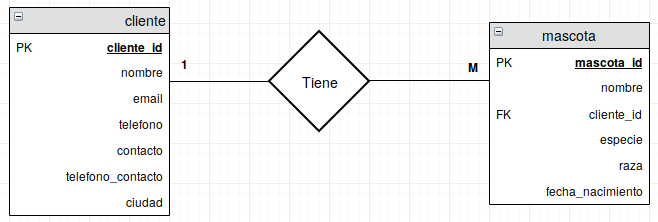
    
 Indique los clientes que no tienen mascota registrada.
 <br><br>
</div>

In [57]:
%sql

 * sqlite:///love4pets.db
Done.


cliente_id,nombre,email,telefono,contacto,telefono_contacto,ciudad
1,Mario Flores Gallardo,marioflores@gmail.com,036-15-36,Aintzane Alvarez Iglesias,210-35-57,Madrid
4,Jan Vargas Santana,vargasjan@gmail.com,780-65-24,,,Madrid
9,Aitor Ruiz Sanchez,aitorsanchez@gmail.com,780-77-24,Gabriel Gonzalez Ortega,784-96-31,Madrid
10,Eric Rubio Carrasco,ericrubio@gmail.com,780-65-79,Cristian Jimenez Martinez,147-01-12,Madrid
12,Jesus Medina Hernandez,jmedinah@gmail.com,782-35-25,Vctor Gonzalez Castillo,661-85-12,Madrid
13,Pol Moya Pena,polmoya@gmail.com,780-25-24,,,Toledo
15,Manuel Angel Gil,manano@gmail.com,733-65-16,Hector Navarro,067-97-91,Madrid


### Operador UNION
Es usado para combinar resultados de varias consultas en una sola vista.
* Cada Instrucción SELECT involucrada en la operación UNION tiene que tener la misma cantidad de columnas.
* Las columnas ademas tienen que tener los mismos tipos de datos.

**Sintaxis de la Operación UNION**
```sql
SELECT column_name(s) FROM table1
UNION
SELECT column_name(s) FROM table2; 
```

In [ ]:
%%sql
select nombre,email,telefono from empleado
UNION
select nombre,email,telefono from cliente

### La Instrucción GROUP BY
Permite agrupar valores por un valor común a ellos

Sintaxis de la instrucción GROUP BY
```sql
SELECT column_name(s)
FROM table_name
WHERE condition
GROUP BY column_name(s)
```

Veamos un ejemplo contamos la cantidad de clientes que habitan en cada ciudad.

In [ ]:
%%sql
select COUNT(nombre),ciudad from cliente
GROUP BY ciudad

<div style="background-color: #81F781">
 <h1> Ejercicio 8. </h1><br>
 No todas las personas tienen la misma cantidad de mascotas. Se requiere que usted indique el cliente y cantidad de mascotas que tiene cada cliente que tenga mascotas.
 <br><br>
</div>

In [59]:
%%sql 


 * sqlite:///love4pets.db
Done.


nombre,count(*)
Alberto Sanz Ruiz,2
Arnau Medina Garcia,1
Carlos Costa Guerrero,1
Gabriel Gonzalez Ortega,1
Ivan Medina Rubio,2
Jose Gallardo Rodriguez,1
Rayan Leon Ferrer,1
Roberto Martin Ortega,1


### La Instrucción HAVING
Permite filtrar una busqueda donde se aplica una función de agregación sobre la condición.

Sintaxis de la instrucción GROUP BY
```sql
SELECT column_name(s)
FROM table_name
WHERE condition
HAVING column_name(s)
```

Tomando el mismo ejemplo anterior queremos mostrar las ciudades que tengan mas de 5 clientes.

In [ ]:
%%sql
select COUNT(nombre),ciudad from cliente
GROUP BY ciudad HAVING COUNT(nombre) > 5;

<div style="background-color: #81F781">
 <h1> Ejercicio 9. </h1><br>
 Se requiere que usted indique los clientes que tienen dos mascotas.
 <br><br>
</div>

In [62]:
%%sql 


 * sqlite:///love4pets.db
Done.


nombre,count(*)
Alberto Sanz Ruiz,2
Ivan Medina Rubio,2


### La Instrucción Insert
La instrucción insert permite agregar nuevos valores a las tablas

```sql
INSERT INTO table_name (columna1, columna2, columna3, ...)
VALUES (valor1, valor2, valor3, ...); 
```

donde el valor1 es insertado en la columna1, el valor2 en la columna2 y asi sucesivamente.

In [ ]:
%sql insert into departamento( departamento_id, nombre) values(8,"cosmetica");

### La Instrucción DELETE
La instrucción DELETE permite ELIMINAR filas que cumplan con una determinada condición

```sql
DELETE FROM table_name
WHERE condition;
```


In [ ]:
%sql delete from departamento where departamento_id=8;